In [1]:
from chartpy.report.utils import get_report_folder_path
from chartpy.report import Report, DrawdownComponent, TitlePage, ContentsPage

import pandas

import os

In [2]:
report_path = get_report_folder_path()
dir_example = os.path.abspath(os.path.join(report_path, "../../chartpy_examples/report_examples"))

In [3]:
df_drawdown_aapl = pandas.read_csv(os.path.abspath(os.path.join(dir_example, "drawdown_aapl.csv")))
df_drawdown_msft = pandas.read_csv(os.path.abspath(os.path.join(dir_example, "drawdown_msft.csv")))
df_return_panel_aapl = pandas.read_csv(os.path.abspath(os.path.join(dir_example, "return_aapl.csv")))
df_return_panel_msft = pandas.read_csv(os.path.abspath(os.path.join(dir_example, "return_msft.csv")))

In [4]:
data = {
    "Apple": {
        "timeseries": df_return_panel_aapl.astype({"Date": "datetime64[ns]"}).set_index("Date"),
        "drawdowns": df_drawdown_aapl.astype(
            {"Peak": "datetime64[ns]", "Valley": "datetime64[ns]", "Recovery": "datetime64[ns]"}
        ).drop(columns=["Unnamed: 0"]),
    },
    "Microsoft": {
        "timeseries": df_return_panel_msft.astype({"Date": "datetime64[ns]"}).set_index("Date"),
        "drawdowns": df_drawdown_msft.astype(
            {"Peak": "datetime64[ns]", "Valley": "datetime64[ns]", "Recovery": "datetime64[ns]"}
        ).drop(columns=["Unnamed: 0"]),
    },
}

In [5]:
components = [
    TitlePage(report_name="Drawdown Example"),
    ContentsPage(),
    DrawdownComponent(
        title="Stock Drawdowns",
        data=data,
    ),
]

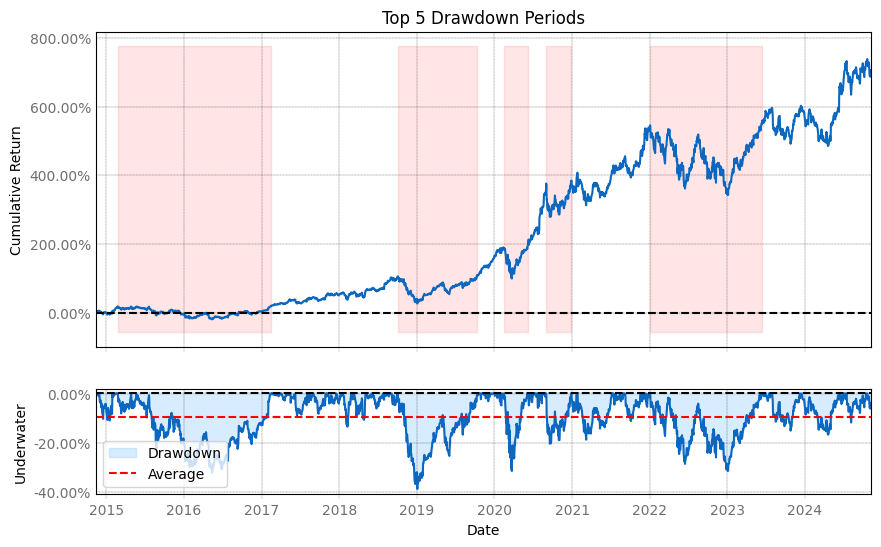

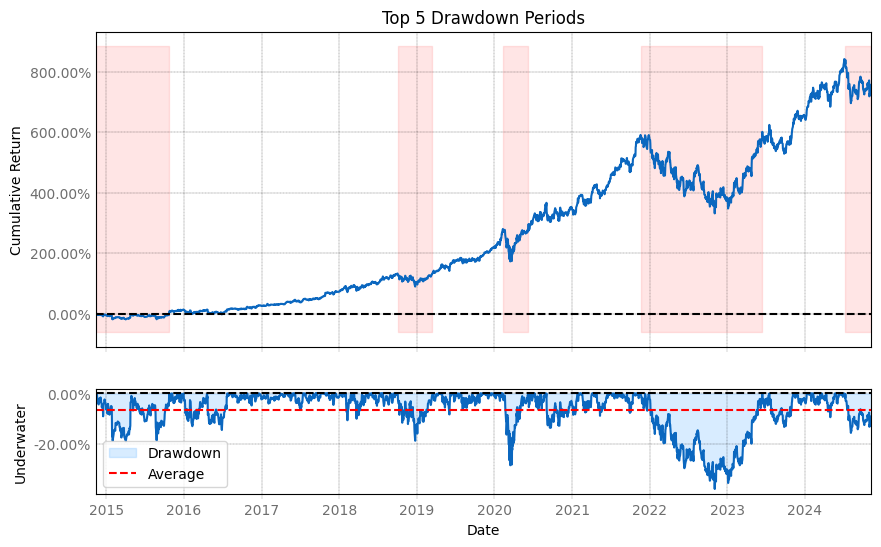

In [6]:
report = Report(components=components)
fpath = os.path.join(dir_example, "drawdown_example.pdf")
report.publish_report(fpath=fpath)